You play a game with four balls: One ball is red, one is blue, one is green and one is yellow. They are placed in a box. You draw a ball out of the box at random and note its color. Without replacing the first ball, you draw a second ball and then paint it to match the color of the first. Replace both balls, and repeat the process. The game ends when all four balls have become the same color. What is the expected number of turns to finish the game?

Extra credit: What if there are more balls and more colors?

In [117]:
from enum import Enum
import random
from tqdm import tqdm_notebook
from multiprocessing import Pool
import itertools
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

In [62]:
class Color(Enum):
    RED = 1
    BLUE = 2
    GREEN = 3
    YELLOW = 4

In [63]:
class Bag:
    
    def __init__(self, init_colors):
        self.balls = init_colors
        
    def draw(self):
        random.shuffle(self.balls)
        self.balls[1] = self.balls[0]
    
    def homogenous(self):
        return len(set(self.balls)) == 1
    
    def __repr__(self):
        return self.__str__()
    
    def __str__(self):
        return ", ".join(sorted(b.name for b in self.balls))

In [64]:
def simulate(colors):
    b = Bag(list(colors))
    
    turns = 0
    
    while not b.homogenous():
    
        b.draw()
        turns+=1
        
    return turns

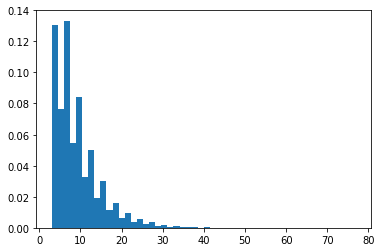

In [144]:
sample_size = 100000

with Pool(processes=4) as p:
    results = p.map(simulate, itertools.repeat(Color,sample_size))

# the histogram of the data
n, bins, patches = plt.hist(results, 50, normed=True)
plt.show()

In [137]:
q = np.mat([[0, 1,    0,    0,  ],
            [0, 6/12, 4/12, 2/12],
            [0, 0,    6/12, 3/12],
            [0, 0,    8/12, 4/12]])

i = np.identity(4)

n = np.linalg.inv(i - q)

n * np.ones((4,1))

matrix([[ 9. ],
        [ 8. ],
        [ 5.5],
        [ 7. ]])

/mnt/74885250885210CA/Workspace/puzzles/puzzles_venv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/mnt/74885250885210CA/Workspace/puzzles/puzzles_venv/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/mnt/74885250885210CA/Workspace/puzzles/puzzles_venv/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/mnt/74885250885210CA/Workspace/puzzles/puzzles_venv/lib/python3.5/site-packa

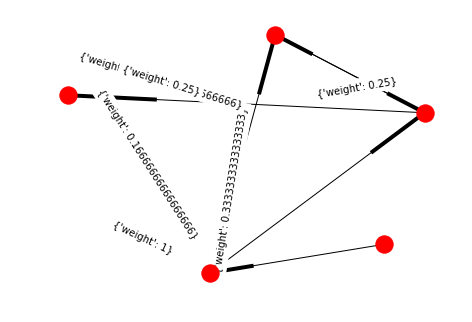

In [136]:
G=nx.MultiDiGraph()
G.add_nodes_from([0,1,2,3,4])
G.add_weighted_edges_from([(0,1,1),
                           (1,2,4/12),
                           (1,3,2/12),
                           (2,3,3/12),
                           (3,2,8/12),
                           (2,4,3/12)])
nx.draw_spring(G)
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))
plt.show()